In [1]:
%pip install gdown pandas numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gdown]32m1/3 [opencv-python]
Note: you may need to restart the kernel to use updated packages.


Some applications for line algebra is cosine similarity, convert color image to grayscale iamge, tabular data analysis, background subtraction

# Câu hỏi 1

In [4]:
import numpy as np

def compute_vector_length(vector):
    len_of_vector = 0
    for i in range(len(vector)):
        len_of_vector += vector[i] ** 2
    len_of_vector = np.sqrt(len_of_vector)
    return len_of_vector

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))

23.28


# Câu hỏi 2

In [5]:
import numpy as np

def compute_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


# Câu hỏi 3

In [ ]:
import numpy as np

def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

# Câu hỏi 4

In [ ]:
import numpy as np

def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

# Câu hỏi 5

In [7]:
import numpy as np

def compute_cosine(x, y):
    numerator = np.dot(x, y)
    denominator = compute_vector_length(x) * compute_vector_length(y)
    return numerator / denominator

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))


0.577


# Background Subtraction

Input: Original Background Image, Target Background Image, Object Image
Idea:
- Make 3 images into the same size
- Bacground subtraction with `object image` and `original background image` => Get mask of object: 
  - Foreground mask (Binary image) including: 0 is background, 1 is the pixel region contain object
- Generate output image:
  - In pixel value `1`: replacing by `object image`'s value
  - In pixel value `0`: replacing by `taget background image`'s value

# Câu hỏi 6

In [11]:
import numpy as np
import cv2
import sys

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("Google Colab environment")
    from google.colab.patches import cv2_imshow
    # Code for colab
    #cv2_imshow(image)
else:
    print("Local environment")
    # Code for local
    #cv2.imshow(window_name, image)
    # cv2.waitKey(0) # wait key before continuing
    # cv2.destroyAllWindows() #close all windows open by OpenCV


Local environment


1. Resize input image for the same size

In [1]:
import cv2
import sys

def read_image(filepath):
    img = cv2.imread(filepath) # default value IMREAD_COLOR
    if img is None:
        sys.exit("Could not read the image.")

    cv2.imshow("Display window", img)
    return img

In [ ]:
#load image
import numpy as np

#now then i loaded 2 image example
#green_background = read_image("./GreenBackground.png")
img = cv2.imread("./GreenBackground.png") # default value IMREAD_COLOR

#cv2.imshow("Display window", img) meet error `Could not load the Qt platform plugin "xcb"``: apt install libxcb-cursor0,
# login as root and unlock some folder to install
# Result always crash when i want to show the image by using cv2.imshow:
#[error] Disposing session as kernel process died ExitCode: undefined, Reason: qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "~/miniconda3/envs/ds_env/lib/python3.11/site-packages/cv2/qt/plugins" even though it was found.
# This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.
# i using ubuntu wsl 2, so it cannot show the gui app

: 

In [ ]:
import cv2
import sys
import matplotlib.pyplot as plt

def read_image_plt(filepath):
    # OpenCV read image BGR, Matplotlib read image RGB
    # So need change color channel to display image correctly
    img = cv2.imread(filepath) # default value IMREAD_COLOR
    if img is None:
        sys.exit("Could not read the image.")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb

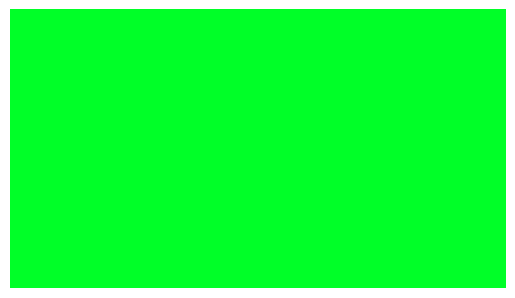

In [23]:
green_background = read_image_plt("./GreenBackground.png")

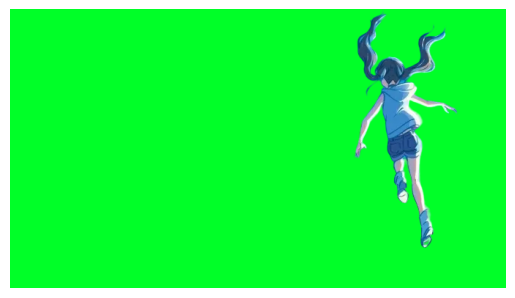

In [27]:
object = read_image_plt("./Object.png")

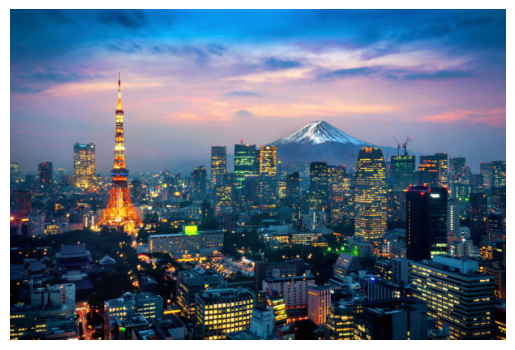

/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/magics/execution.py:521: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <#see the full traceback>
Valid modes: ['Plain', 'Context', 'Verbose', 'Minimal', 'Docs']
  warn('Error changing %s exception modes.\n%s' %


In [31]:
new_background = read_image_plt("./NewBackground.jpg")
%tb #see the full traceback

2. Build compute_difference() function:

In [ ]:
def compute_difference():


3. Build compute_binary_mask() function:

In [ ]:
def compute_binary_mask():


4. Build replace_background() function:

In [ ]:
def replace_background():


# Câu hỏi 7

# Câu hỏi 8

# Câu hỏi 9

# Câu hỏi 10

# Câu hỏi 11

In [ ]:
!gdown 1KAZQVg40mG0vuEdC4HbjkDdms_brf2bW



# Câu hỏi 11

In [ ]:
# *********** Your code here ***********
# Sử dụng công thức Lightness: (max(R,G,B) + min(R,G,B))/2
gray_img_01 = ### Your code here



# Câu hỏi 12

In [ ]:
# *********** Your code here ***********
# Sử dụng công thức Average: (R+G+B)/3
gray_img_02 = ### Your code here



# Câu hỏi 13

In [ ]:
# *********** Your code here ***********
# Sử dụng công thức Luminosity: 0.21*R + 0.72*G + 0.07*B
gray_img_03 = ### Your code here




# **Background Subtraction**

In [ ]:
!gdown 1QAXardZbIByfehzshQvbw4ByxiTC1ztU
!gdown 1DpKi1rgqHgAEAA0Cx2RWZs_7yWv5bv2T
!gdown 1DYO_g9_NPjwVOxXNZ4upEWjfHBm4byqU

# Câu hỏi 14

# Câu hỏi 15

# Câu hỏi 16

In [ ]:
!gdown 1YF4WkCaaGYd2Zm-PNoLa2A2tFf3e64ci

# Câu hỏi 17

# Câu hỏi 18

# Câu hỏi 19

# Câu hỏi 20